Credits:

If you are interested in learning more on how deep learning works, I would recommend fast.ai course:
https://course.fast.ai/videos/?lesson=1

dataset for training used was sourced from  PKLot - A Robust Dataset for Parking Lot Classification http://www.inf.ufpr.br/lesoliveira/download/pklot-readme.pdf

pre trained image net models were sourced from https://modelzoo.co/

fastai api on top of pytouch was used for codding  

Python recipes for image processing were adopted from various answers on stackoverflow


In [96]:
%reload_ext autoreload
%autoreload 2 
%matplotlib inline

In [97]:
import os
import shutil
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [98]:
def extract_all(archives, extract_path):
    for filename in archives:
        shutil.unpack_archive(filename, extract_path)

In [25]:
root_dir = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
data_folder = os.path.join(root_dir, "data")
carparking_dataset_path = os.path.join(root_dir, "data","PKLot.tar.gz")

In [11]:
# unpack dataset
shutil.unpack_archive(carparking_dataset_path, data_folder)

In [4]:
path_to_data="C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented"
path_to_data_occupied=os.path.join(path_to_data,"Occupied")
path_to_data_empty=os.path.join(path_to_data,"Empty")

In [29]:
# fix folder structure 

for subfolder in os.listdir(path_to_data):
    if subfolder not in ["Occupied", "Empty"]:
        subfolderOccupied = os.path.join(path_to_data, subfolder, "Occupied")
        subfolderEmpty = os.path.join(path_to_data, subfolder, "Empty")
        if os.path.isdir(subfolderOccupied):
            for Occupiedfile in os.listdir(subfolderOccupied):
                shutil.move(os.path.join(subfolderOccupied, Occupiedfile), os.path.join(path_to_data_occupied,Occupiedfile))
        if os.path.isdir(subfolderEmpty):
            for Emptyfile in os.listdir(subfolderEmpty):
                shutil.move(os.path.join(subfolderEmpty, Emptyfile), os.path.join(path_to_data_empty,Emptyfile))
            


In [26]:
# setting system settings 
bs = 16 # batch size
path_img = Path(path_to_data)
path_img

WindowsPath('C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented/test')

In [6]:
collate_fn = torch.utils.data.dataloader.default_collate

In [9]:
from torchvision import transforms

tfms = get_transforms(do_flip=False)

In [12]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=299, bs=bs, valid_pct=0.2).normalize(imagenet_stats)


In [13]:
print(data.classes)
len(data.classes),data.c


['Empty', 'Occupied']


(2, 2)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [15]:
#learn.model

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.021614,0.024555,0.001178,1:48:48


In [17]:
learn.save('stage-1')

In [18]:
# Results
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

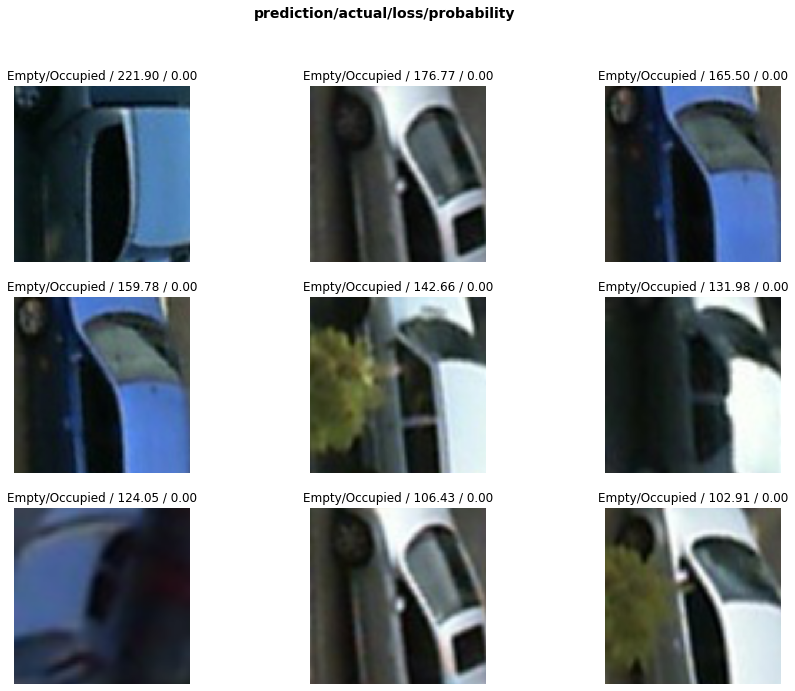

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [20]:
interp.most_confused(min_val=2)

[('Occupied', 'Empty', 107), ('Empty', 'Occupied', 57)]

In [44]:
# export model to prod
from torchvision import transforms

tfms = get_transforms(do_flip=False)
path_to_data="C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented"
path_img = Path(path_to_data)
data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=299, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn = learn.load('stage-1')
learn.export()



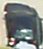

In [41]:
path = Path("C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented")
learn = load_learner(path)
test_img = "C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/test/2012-09-11_15_16_58#042.jpg"
img = open_image(test_img);img

In [43]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Occupied

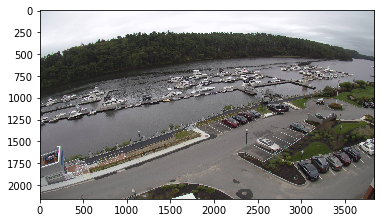

In [62]:
# Source url https://www.insecam.org/en/view/806814/
mjpeg_url = "http://75.147.0.206/mjpg/video.mjpg"
import requests 
from PIL import Image
import io
import datetime

r = requests.get(mjpeg_url, stream=True)
if (r.status_code == 200): 
    jpeg_chunk = bytearray()
    for chunk in r.iter_content(chunk_size=1024): 
        jpeg_chunk += chunk 
        a = jpeg_chunk.find(b'\xff\xd8')
        b = jpeg_chunk.find(b'\xff\xd9')
        if a != -1 and b != -1: 
            jpg = jpeg_chunk[a:b+2]
        image = Image.open(io.BytesIO(jpg))
        plt.imshow(image)
        plt.show()
        
        timestamp = datetime.datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
        image.save("images/"+timestamp+".jpg")
        break
        

In [92]:
# Masks created using tool hosted at https://www.image-map.net/
carparking_masks = [
    (1,[[2927,1750],[3067,1953],[3182,1912],[3039,1719]]),
    (2,[[3104,1712],[3284,1916],[3341,1879],[3192,1692]]),
    (3,[[3267,1672],[3314,1651],[3494,1831],[3419,1865]]),
    (4,[[3369,1640],[3418,1608],[3596,1786],[3537,1813]]),
    (5,[[3483,1592],[3526,1565],[3682,1732],[3634,1759]]),
    (6,[[3623,1551],[3574,1567],[3725,1718],[3763,1691]]),
    (7,[[3650,1549],[3704,1522],[3833,1597],[3806,1689]]),
    (8,[[2323,1594],[2550,1729],[2631,1681],[2393,1551]]),
    (9,[[2469,1524],[2679,1638],[2760,1600],[2528,1481]]),
    (10,[[2641,1438],[2852,1541],[2814,1567],[2598,1465]]),
    (11,[[2728,1384],[2949,1476],[2906,1503],[2690,1411]]),
    (12,[[2819,1339],[3040,1425],[2992,1452],[2765,1365]]),
    (13,[[3105,1376],[2916,1295],[2879,1312],[3067,1403]]),
    (14,[[3008,1247],[3170,1322],[3143,1349],[2976,1274]]),
    (15,[[1805,1339],[1865,1312],[2021,1414],[1956,1436]]),
    (16,[[1924,1298],[1983,1277],[2140,1368],[2091,1400]]),
    (17,[[2037,1269],[2102,1242],[2264,1333],[2199,1360]]),
    (18,[[2199,1209],[2339,1301],[2393,1274],[2242,1188]]),
    (19,[[2269,1166],[2431,1269],[2480,1252],[2318,1145]]),
    (20,[[2442,1128],[2566,1209],[2512,1231],[2382,1139]]),
    (21,[[2582,1107],[2717,1188],[2776,1161],[2636,1075]]),
    (22,[[2722,1064],[2836,1139],[2879,1118],[2765,1053]])
]

polygons = [ mask[1] for mask in carparking_masks];polygons

[[[2927, 1750], [3067, 1953], [3182, 1912], [3039, 1719]],
 [[3104, 1712], [3284, 1916], [3341, 1879], [3192, 1692]],
 [[3267, 1672], [3314, 1651], [3494, 1831], [3419, 1865]],
 [[3369, 1640], [3418, 1608], [3596, 1786], [3537, 1813]],
 [[3483, 1592], [3526, 1565], [3682, 1732], [3634, 1759]],
 [[3623, 1551], [3574, 1567], [3725, 1718], [3763, 1691]],
 [[3650, 1549], [3704, 1522], [3833, 1597], [3806, 1689]],
 [[2323, 1594], [2550, 1729], [2631, 1681], [2393, 1551]],
 [[2469, 1524], [2679, 1638], [2760, 1600], [2528, 1481]],
 [[2641, 1438], [2852, 1541], [2814, 1567], [2598, 1465]],
 [[2728, 1384], [2949, 1476], [2906, 1503], [2690, 1411]],
 [[2819, 1339], [3040, 1425], [2992, 1452], [2765, 1365]],
 [[3105, 1376], [2916, 1295], [2879, 1312], [3067, 1403]],
 [[3008, 1247], [3170, 1322], [3143, 1349], [2976, 1274]],
 [[1805, 1339], [1865, 1312], [2021, 1414], [1956, 1436]],
 [[1924, 1298], [1983, 1277], [2140, 1368], [2091, 1400]],
 [[2037, 1269], [2102, 1242], [2264, 1333], [2199, 1360]

In [122]:
import numpy
from PIL import Image, ImageDraw

def mask_crop_image(input_image_path, polygon):
    
    
    
    # create an image with max coodinates from polygon
    # update the values in this new image with values from 
    
    updated_polygon = []
    for coodinates in polygon:
        l = coodinates
        coodinates = tuple(l)
        updated_polygon.append(coodinates)
    polygon = updated_polygon
    print(polygon)
    
    # read image as RGB and add alpha (transparency)
    im = Image.open(input_image_path).convert("RGBA")

    # convert to numpy (for convenience)
    imArray = numpy.asarray(im)

    # create mask
    maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
    ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
    mask = numpy.array(maskIm)

    # assemble new image (uint8: 0-255)
    newImArray = numpy.empty(imArray.shape,dtype='uint8')

    # colors (three first columns, RGB)
    newImArray[:,:,:3] = imArray[:,:,:3]

    # transparency (4th column)
    newImArray[:,:,3] = mask*255

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")

    # back to Image from numpy
    newIm = Image.fromarray(newImArray, "RGBA")
    return newIm 

# testing function 
# input_image_path = "images/2019-09-07T22-11-46.png"
# polygon = [[2927, 1750], [3067, 1953], [3182, 1912], [3039, 1719]]
# img = mask_crop_image(input_image_path, polygon)
# newIm.show()

In [126]:
import cv2
import numpy
from PIL import Image, ImageDraw


# input_image = "images/2019-09-07T22-11-46.jpg"
# polygon = [[2927,1750],[3067,1953],[3182,1912],[3039,1719]]

def extract_crop(input_image_path, polygon):
# for polygon in polygons:
#     print(polygon)
    img = Image.open(input_image_path)
    # # convert to numpy (for convenience)
    imArray = numpy.asarray(img)

    y=min([cood[1] for cood in polygon])
    x=min([cood[0] for cood in polygon])
    h=max([cood[1] for cood in polygon]) - y
    w=max([cood[0] for cood in polygon]) - x

    crop_image = imArray[y:y+h, x:x+w].copy()
    return crop_image
#     cv2.imshow('Window', test_image2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [114]:
path = Path("C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented")
learn = load_learner(path)

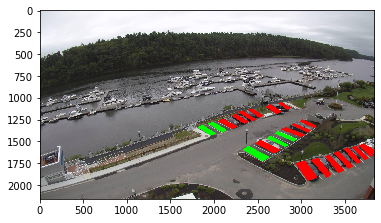

In [128]:
# plot polygon on top of still image
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

input_image_path = "C:/Users/sheec/Desktop/Projects/govhack2019/parking/images/2019-09-07T22-11-46.png"
image = cv2.imread(input_image_path)

red = (0,0,255)
green = (0,255,0)

for polygon in polygons:
    
    test_image_path = "C:/Users/sheec/Desktop/Projects/govhack2019/parking/images/test_case.png"
    
    if os.path.isfile(test_image_path):
        os.remove(test_image_path)
        
    crop_img = extract_crop(input_image_path, polygon)
    cv2.imwrite(test_image_path, crop_img)
    
#     newIm = mask_crop_image(test_image_path, polygon)
#     if os.path.isfile(test_image_path):
#         os.remove(test_image_path)
#     newIm.save(test_image_path)
    
    test_image = open_image(test_image_path)
    
#     test_image2 = cv2.imread(test_image_path)
#     cv2.imshow('Window', test_image2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    pred_class,pred_idx,outputs = learn.predict(test_image)
    label = pred_class.obj
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1,1,2))
#     print(label)
    if label in "Empty":
        cv2.fillPoly(image,[pts],green)
    else:
        cv2.fillPoly(image,[pts],red)
    
#     break
    
image = image[:,:,::-1]
plt.imshow(image)
# image = cv2.resize(image,(1080,1080))
# cv2.imshow('Window', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
